
# <span style="color:orange">12/05 - Pair Programming Limpieza 7 - Lidia y Tatiana</span>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from scipy import stats # para hacer la transformación box-cox

from sklearn.preprocessing import MinMaxScaler 

pd.options.display.max_columns = None # recordamos que este comando nos permitía ver todas las columnas de dataframe

In [2]:
df = pd.read_csv("./attacks_limpiando_con_coordenadas.csv", index_col = 0)
df

,year,type,country,age,species_,fecha_limpia,fatal,sex,latitud,longitud
0,2018,Boating,usa,57.0,White shark,Jun,N,F,39.7837304,-100.445882
1,2018,Unprovoked,usa,11.0,Unespecific,Jun,N,F,39.7837304,-100.445882
2,2018,Invalid,usa,48.0,Unespecific,Jun,N,M,39.7837304,-100.445882
3,2018,Unprovoked,australia,27.0,Unespecific,Jun,N,M,-24.7761086,134.755
4,2018,Provoked,mexico,27.0,Tiger shark,Jun,N,M,23.6585116,-102.0077097
...,...,...,...,...,...,...,...,...,...,...
6213,0,Unprovoked,australia,27.0,Tiger shark,Unknown,Y,M,-24.7761086,134.755
6214,0,Unprovoked,australia,27.0,Tiger shark,Unknown,Y,M,-24.7761086,134.755
6215,0,Unprovoked,australia,27.0,Tiger shark,Unknown,Y,M,-24.7761086,134.755
6216,0,Unprovoked,panama,27.0,Unespecific,Unknown,Y,M,8.559559,-81.1308434


In [3]:
#Queremos saber la suma de los valores únicos que pueda haber en la columna "age"
df.age.unique().sum()

3421.0

<AxesSubplot:xlabel='age', ylabel='Density'>

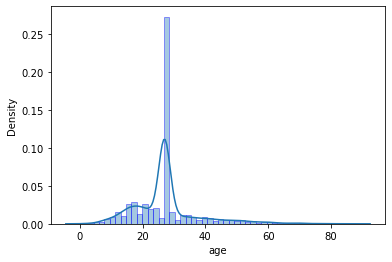

In [4]:
#Esta es la distribución de nuestros datos.
sns.distplot(df['age'],hist_kws=dict(edgecolor="blue"))

**¿Qué tendréis que hacer?**

- **Pregunta teórica: Podríais explicar en pocas palabras ¿Qué es lo que hace exactamente el método boxcox de normalización de datos?**

    Boxcox: Aplica una transformación boxcox de sobre nuestros datos, para que esten en la misma escala entre -5 y 5.

    La transformación de Box-Cox es una transformación potencial que corrije la asimetría (sesgos en la distribución de errores)de una variable, varianzas diferentes o la no linealidad entre variables.

    En consecuencia,resulta muy útil para transformar una variable y obtener una nueva que siga una distribución normal.

- **Normalizad los datos de la columna age. Utilizad los métodos aprendidos y explicad las diferencias entre cada uno de ellos. Para cada transformación que hagáis cread una columna nueva.**

    NORMALIZACIÓN MANUAL: 

In [5]:
def normalizacion_manual(col):
    media = df[col].mean()
    max = df[col].max()
    min= df[col].min()

    df["NORM_manual_"+ col] = (df[col] - media) / (max - min)

In [6]:
normalizacion_manual("age")

In [7]:
df.head(2)

,year,type,country,age,species_,fecha_limpia,fatal,sex,latitud,longitud,NORM_manual_age
0,2018,Boating,usa,57.0,White shark,Jun,N,F,39.7837304,-100.445882,0.346937
1,2018,Unprovoked,usa,11.0,Unespecific,Jun,N,F,39.7837304,-100.445882,-0.187946


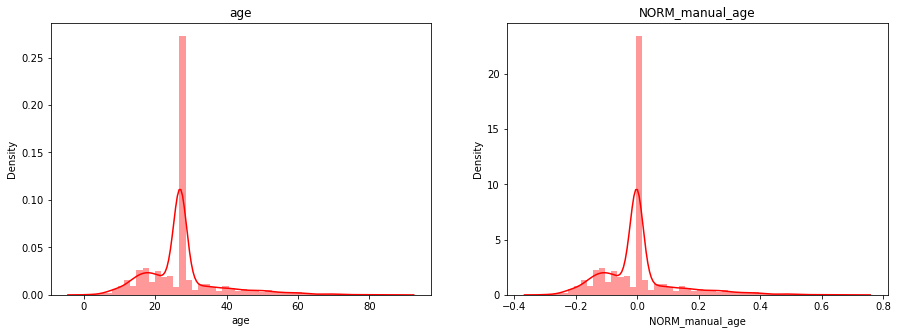

In [8]:
fig, axes = plt.subplots(1, 2, figsize = (15,5))

axes[0].set_title('age')
axes[1].set_title("NORM_manual_age")

sns.distplot(df['age'] ,ax = axes[0],color="r")
sns.distplot(df['NORM_manual_age'], ax = axes[1],color="r");

    LOGARITMICA:

In [9]:
df['NORM_log'] = df['age'].apply(lambda x: np.log(x) if x != 0 else 0)

In [10]:
df.head(2)

,year,type,country,age,species_,fecha_limpia,fatal,sex,latitud,longitud,NORM_manual_age,NORM_log
0,2018,Boating,usa,57.0,White shark,Jun,N,F,39.7837304,-100.445882,0.346937,4.043051
1,2018,Unprovoked,usa,11.0,Unespecific,Jun,N,F,39.7837304,-100.445882,-0.187946,2.397895


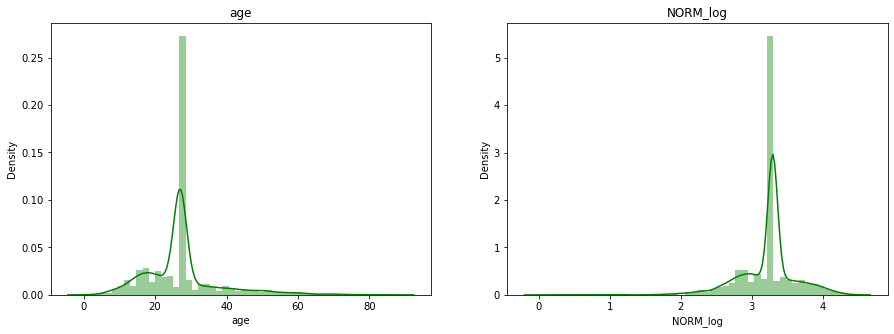

In [11]:
fig, axes = plt.subplots(1, 2, figsize = (15,5))

axes[0].set_title('age')
axes[1].set_title('NORM_log')

sns.distplot(df['age'] ,ax = axes[0],color="g")
sns.distplot(df['NORM_log'], ax = axes[1],color="g");

    RAIZ CUADRADA:

In [12]:
import math 
df['NORM_raiz_cuadrada'] = df['age'].apply(lambda x: math.sqrt(x))

In [13]:
df.head(2)

,year,type,country,age,species_,fecha_limpia,fatal,sex,latitud,longitud,NORM_manual_age,NORM_log,NORM_raiz_cuadrada
0,2018,Boating,usa,57.0,White shark,Jun,N,F,39.7837304,-100.445882,0.346937,4.043051,7.549834
1,2018,Unprovoked,usa,11.0,Unespecific,Jun,N,F,39.7837304,-100.445882,-0.187946,2.397895,3.316625


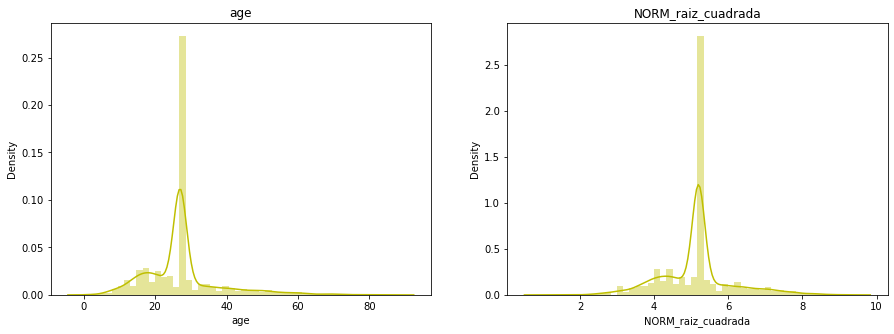

In [14]:
fig, axes = plt.subplots(1, 2, figsize = (15,5))

axes[0].set_title('age')
axes[1].set_title('NORM_raiz_cuadrada')

sns.distplot(df['age'] ,ax = axes[0],color="y")
sns.distplot(df['NORM_raiz_cuadrada'], ax = axes[1],color="y");

    BOX COX:

In [15]:
df['NORM_boxcox'], lambda_ajustada = stats.boxcox(df['age'])
lambda_ajustada #transforma

0.35942131224514967

In [16]:
df.head(2)

,year,type,country,age,species_,fecha_limpia,fatal,sex,latitud,longitud,NORM_manual_age,NORM_log,NORM_raiz_cuadrada,NORM_boxcox
0,2018,Boating,usa,57.0,White shark,Jun,N,F,39.7837304,-100.445882,0.346937,4.043051,7.549834,9.116327
1,2018,Unprovoked,usa,11.0,Unespecific,Jun,N,F,39.7837304,-100.445882,-0.187946,2.397895,3.316625,3.804860


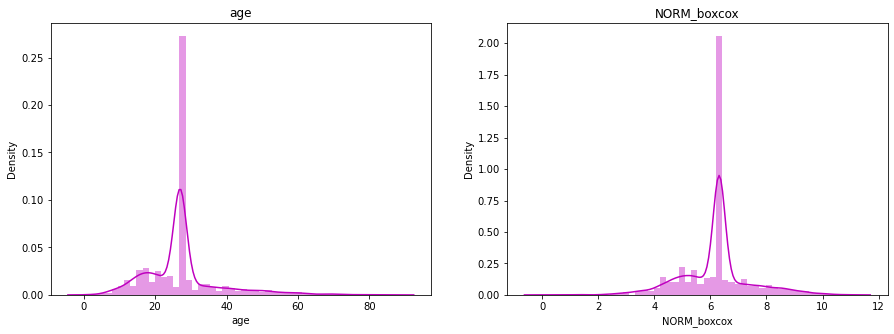

In [17]:

fig, axes = plt.subplots(1, 2, figsize = (15,5))

axes[0].set_title('age')
axes[1].set_title('NORM_boxcox')

sns.distplot(df['age'] ,ax = axes[0],color="m")
sns.distplot(df['NORM_boxcox'], ax = axes[1],color="m");

    SKLEARN MINMAXSCALLER:
    

In [18]:
scaler = MinMaxScaler()

In [19]:
# and storing the result in ScaledPrice Column
df[["NORM_scaller"]] = scaler.fit_transform(df[["age"]])

In [20]:
df.head(1)

,year,type,country,age,species_,fecha_limpia,fatal,sex,latitud,longitud,NORM_manual_age,NORM_log,NORM_raiz_cuadrada,NORM_boxcox,NORM_scaller
0,2018,Boating,usa,57.0,White shark,Jun,N,F,39.7837304,-100.445882,0.346937,4.043051,7.549834,9.116327,0.651163


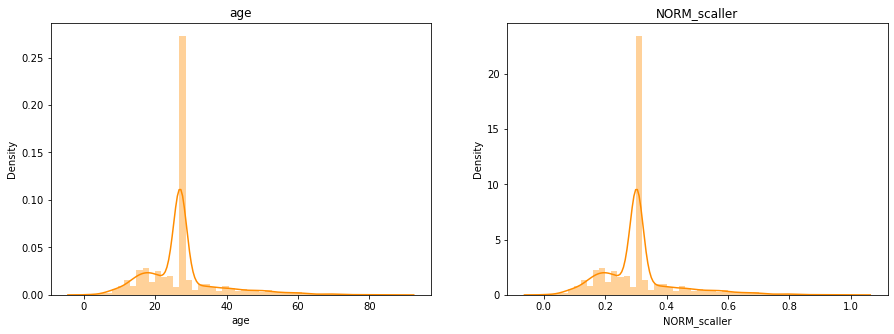

In [21]:
fig, axes = plt.subplots(1, 2, figsize = (15,5))

axes[0].set_title('age')
axes[1].set_title('NORM_scaller')

sns.distplot(df['age'] ,ax = axes[0],color="darkorange")
sns.distplot(df['NORM_scaller'], ax = axes[1],color="darkorange");

In [22]:
columnas = "NORM_manual_age","NORM_log","NORM_raiz_cuadrada","NORM_boxcox","NORM_scaller"
columnas

('NORM_manual_age',
 'NORM_log',
 'NORM_raiz_cuadrada',
 'NORM_boxcox',
 'NORM_scaller')

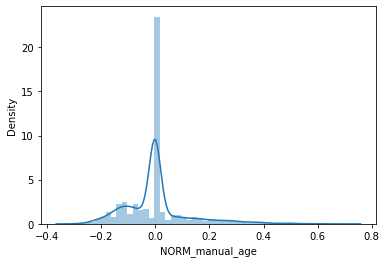

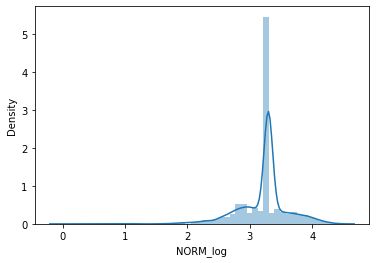

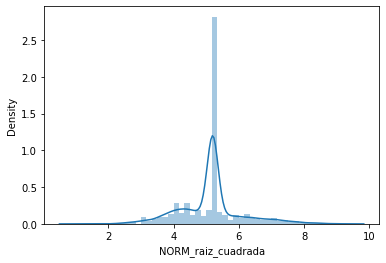

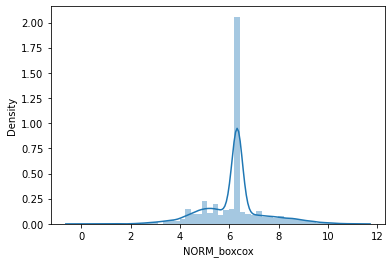

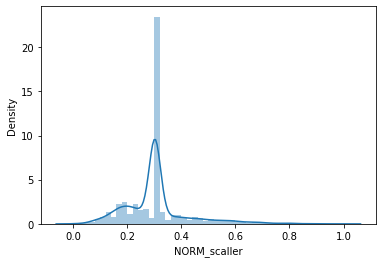

In [29]:
for i in columnas:
    sns.distplot(df[i]) #lista de todas las columnas normalizadas
    plt.show()


- **Guardad el csv con los cambios.**

In [ ]:
df.to_csv("limpieza_7.csv")